<a href="https://colab.research.google.com/github/jamescp/Utils/blob/master/Copy_of_AnaliseCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos dados da pandemia de Covid-19 no Maranhão durante o ano de 2020.**



No Brasil no início da pandemia, os casos se concentraram nas capitais, seguindo-se o processo de interiorização, com aumento de novos casos em cidades de menor porte populacional (Silva; Jardim; Santos, 2020). 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # plotting data



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

In [ ]:
#Transformação tipo da colunda data:
df['date'] = pd.to_datetime(df['date'])


#Seleciona somente o estado do Maranhão
dadosMA= df[df.state == "MA"]

In [ ]:
#Imprime dados atualizados dos Casos e Óbitos acumulados desde o início da pandemia no Maranhão.
print("DATA:", dadosMA['date'].max())
print('CASOS MA:', dadosMA['newCases'].sum(),'\nÓBITOS MA:',dadosMA['newDeaths'].sum())

DATA: 2022-07-17 00:00:00
CASOS MA: 451368 
ÓBITOS MA: 10917


In [ ]:
#Cria as colunas  mes e ano
dadosMA['mes'] = dadosMA['date'].dt.strftime('%b')
dadosMA['meses'] = dadosMA['date'].dt.to_period('m')
dadosMA['ano'] = dadosMA['date'].dt.strftime('%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
a=df['date'].max().date()
#a.apply(lambda x: x.date())


datetime.date(2022, 7, 17)

In [ ]:
table1 = dadosMA.groupby(['ano', 'meses','mes']).agg(
    casos = ("newCases", "sum"),
    obitos = ("newDeaths", "sum")
)
                         
table1.tail()

casos  obitos
ano  meses   mes               
2022 2022-03 Mar  12711      82
     2022-04 Apr   6995      11
     2022-05 May   5484       6
     2022-06 Jun   5175       7
     2022-07 Jul   8127      21

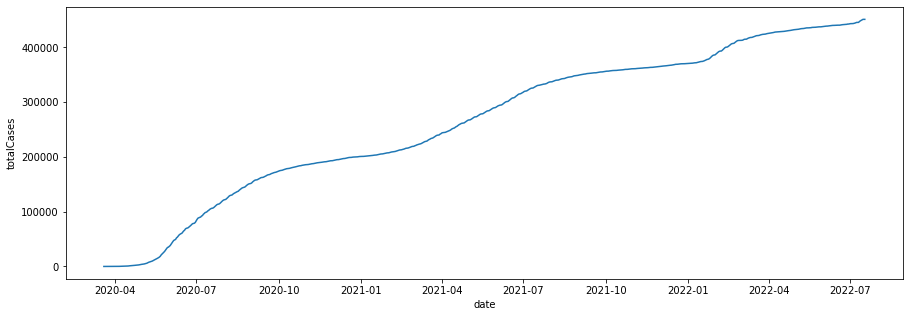

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dadosMA, x='date', y='totalCases');